<a href="https://colab.research.google.com/github/JoshJingtianWang/Wine_Color_and_Quality_Prediction_Using_Machine_Learning/blob/main/decisiontree_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/drive')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [4]:
import os
os.chdir('/content/drive/MyDrive/Spitale Lab/Fundamentals_of_Data_Science/module 8')

In [5]:
!pwd

/content/drive/MyDrive/Spitale Lab/Fundamentals_of_Data_Science/module 8


In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_breast_cancer

In [14]:
dataset=pd.read_csv('Combined_WineQuality_RedWhite.csv')

In [15]:
dataset.shape

(6497, 13)

In [16]:
dataset.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality[DV],Color[DV]
0,6.2,0.270,0.32,6.3,0.048,47.0,159.0,0.99282,3.21,0.60,11.0,6,White
1,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7,Red
2,6.3,0.230,0.33,6.9,0.052,23.0,118.0,0.99380,3.23,0.46,10.4,6,White
3,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,Red
4,7.6,0.270,0.52,3.2,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6,White


In [92]:
X = dataset.drop(['Color[DV]','Quality[DV]'], axis=1)
y = dataset['Color[DV]']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs=2, random_state=0)

clf=classifier.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [26]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9953846153846154


In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Red       1.00      0.99      0.99       498
       White       1.00      1.00      1.00      1452

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



In [42]:
clf.classes_

array(['Red', 'White'], dtype=object)

In [44]:
clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [41]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
metrics.roc_curve(y_test, y_pred_proba,pos_label='R')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


(array([0.        , 0.13435897, 0.16205128, 0.17846154, 0.19435897,
        0.20051282, 0.20564103, 0.20974359, 0.21230769, 0.21538462,
        0.21846154, 0.22102564, 0.22307692, 0.22410256, 0.22666667,
        0.22974359, 0.23179487, 0.23333333, 0.23589744, 0.23794872,
        0.24      , 0.24051282, 0.2425641 , 0.24307692, 0.24564103,
        0.24769231, 0.24871795, 0.24974359, 0.25128205, 0.25846154,
        0.25948718, 0.26051282, 0.2625641 , 0.26358974, 0.26512821,
        0.26615385, 0.26769231, 0.26871795, 0.27076923, 0.27384615,
        0.27487179, 0.27641026, 0.2825641 , 0.28512821, 0.29076923,
        0.29589744, 0.31230769, 0.32102564, 0.33538462, 0.35692308,
        0.38410256, 0.44769231, 0.44871795, 0.44923077, 1.        ]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan

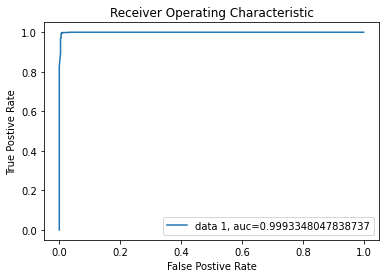

In [49]:
plt.title('Receiver Operating Characteristic')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba,pos_label='White')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.show()

In [94]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
clf=classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 481   17]
 [   8 1444]]
              precision    recall  f1-score   support

         Red       0.98      0.97      0.97       498
       White       0.99      0.99      0.99      1452

    accuracy                           0.99      1950
   macro avg       0.99      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



In [ ]:
tree.plot_tree(clf)

In [ ]:
fig=plt.figure(figsize=(70,100))
fig=tree.plot_tree(clf,feature_names=dataset.columns, filled=True)

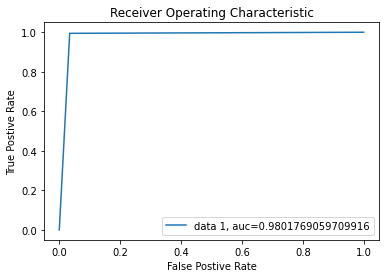

In [97]:
plt.title('Receiver Operating Characteristic')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba,pos_label='White')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.show()

Linear regression

In [59]:
dataset.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality[DV],Color[DV]
0,6.2,0.270,0.32,6.3,0.048,47.0,159.0,0.99282,3.21,0.60,11.0,6,White
1,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7,Red
2,6.3,0.230,0.33,6.9,0.052,23.0,118.0,0.99380,3.23,0.46,10.4,6,White
3,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,Red
4,7.6,0.270,0.52,3.2,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6,White


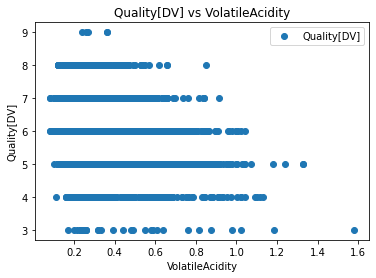

In [100]:
dataset.plot(x='VolatileAcidity',  y='Quality[DV]', style='o')
plt.title('Quality[DV] vs VolatileAcidity')
plt.xlabel('VolatileAcidity')
plt.ylabel('Quality[DV]')
plt.show()

FixedAcidity, VolatileAcidity, Alcohol

In [80]:
X = dataset[['FixedAcidity', 'VolatileAcidity', 'Alcohol']]
y = dataset['Quality[DV]']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [83]:
print(regressor.intercept_)

2.7868203099681517


In [84]:
print(regressor.coef_)

[ 0.01582125 -1.31810944  0.32063009]


In [85]:
y_pred = regressor.predict(X_test)

In [86]:
df= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
5316,6,5.885256
5210,6,5.276065
3518,6,6.178282
1622,6,5.518990
2443,6,4.955995
...,...,...
5710,5,5.551380
6475,5,5.544330
1433,6,6.113227
2707,8,6.432078


In [87]:
from sklearn import metrics
print('R-Square:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Eror:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.26254814399137594
Mean Absolute Eror: 0.5921052950434161
Mean Squared Error: 0.5854839738634053
Root Mean Squared Error: 0.7651692452414729
